<a href="https://colab.research.google.com/github/sunyingjian/-Logging-related-network/blob/master/%E5%BB%B6%E5%AE%89%E6%B2%B9%E7%94%B0SMOTE%2CKNN%2Cgbdt%2C%E9%9A%8F%E6%9C%BA%E6%A3%AE%E6%9E%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size=5px color="red">✦ *Google Colab 突破90分钟自动断开:</font>
<p><font size=3px > 每60分钟自动运行代码以刷新90分钟断开限制. 打开 developer-settings (在你的浏览器) 快速健 Ctrl+Shift+I 然后按console 输入以下代码 Enter. ( mac 按 Option+Command+I)</p><b>复制以下隐藏代码粉贴在浏览器console！！不要关闭浏览器以免失效</b>

<code>function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-connect-button").click() 
}setInterval(ClickConnect,6000)</code>

In [ ]:
#@markdown <h3>← 输入了代码后运行以防止断开</h>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [ ]:
! git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 56 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/numpy-/3345train data.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
filename = 'facies_vectors.csv'
training_data = pd.read_csv('/content/numpy-/3345train data.csv')
training_data
testing_data = pd.read_csv('/content/numpy-/3345test_data.csv')
testing_data

,AC,CAL,GR,K,RD,SP,Core Lithology
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504,5
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568,7
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567,3
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180,7
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605,7
...,...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936,6
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809,3
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486,5
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641,6


#训练集处理

In [ ]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
training_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3345.000000,3345.000000
mean,2.107992e-01,1.450162e-01,1.662901e-01,3.464980e-01,4.917120e-02,0.418110,4.221525
std,1.099814e-01,1.353280e-01,1.036918e-01,1.808527e-01,8.719010e-02,0.196548,2.079667
min,1.000000e-07,1.000000e-08,1.000000e-07,1.000000e-07,1.000000e-09,-0.062739,1.000000
25%,1.594008e-01,5.225926e-02,8.778840e-02,2.079726e-01,1.270254e-02,0.325241,2.000000
50%,2.124234e-01,9.779821e-02,1.520483e-01,3.352124e-01,2.403313e-02,0.384527,4.000000
75%,2.574892e-01,1.850738e-01,2.359244e-01,4.811758e-01,4.815465e-02,0.439047,7.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,7.000000


#测试集处理

In [ ]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
testing_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129,4.215847
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271,2.072619
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365,1.000000
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109,2.000000
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000,4.000000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390,7.000000
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070,7.000000


CS     194
MS     710
FS     751
SS     166
DM     482
LS     114
MDS    928
Name: Core Lithology, dtype: int64

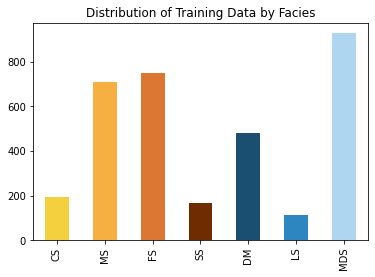

In [ ]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
#计算每个相的唯一条目数，然后按相数（而不是条目数）对它们进行排序
facies_counts = training_data['Core Lithology'].value_counts().sort_index()
#use facies labels to index each count
#使用相标签索引每个计数
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

##继续处理数据

In [ ]:
correct_facies_labels = training_data['Core Lithology'].values
correct_facies_labels_test = testing_data['Core Lithology'].values
feature_vectors = training_data.drop(['Core Lithology'], axis=1)
feature_vectors_test = testing_data.drop(['Core Lithology'], axis=1)
feature_vectors.describe()
feature_vectors_test.describe()

,AC,CAL,GR,K,RD,SP
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070


Scikit包含一个预处理模块，可以“标准化”数据（赋予每个变量零均值和单位方差，也称为白化）。 许多机器学习算法都假定特征将是标准的正态分布数据（即：均值和单位方差为零的高斯）。 用于标准化训练集的因素必须应用于将输入到分类器的任何后续功能集中。 StandardScalar类可以适合于训练集，并在以后用于标准化任何训练数据。

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)
scaler_test = preprocessing.StandardScaler().fit(feature_vectors_test)
scaled_features_test = scaler.transform(feature_vectors_test)

In [ ]:
feature_vectors

,AC,CAL,GR,K,RD,SP
0,0.029102,0.031789,0.026724,0.202335,0.078986,0.333754
1,0.032883,0.033469,0.030592,0.203141,0.076064,0.333669
2,0.034385,0.037006,0.032359,0.200121,0.074503,0.333619
3,0.243816,0.143381,0.086581,0.290115,0.017649,0.094025
4,0.248043,0.146786,0.084643,0.283874,0.017286,0.090554
...,...,...,...,...,...,...
3340,0.012092,0.067866,0.007657,0.077713,0.181798,0.348797
3341,0.011831,0.069989,0.007606,0.081135,0.206839,0.348560
3342,0.011533,0.070121,0.009591,0.081337,0.250115,0.348470
3343,0.008903,0.069325,0.010596,0.081135,0.281774,0.348340


In [ ]:
feature_vectors_test

,AC,CAL,GR,K,RD,SP
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605
...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641


##导入本地py模块


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Machine-Learning-From-Scratch-master')

In [ ]:
X_train = scaled_features
X_test = scaled_features_test
y_train = correct_facies_labels
y_test = correct_facies_labels_test

##使用KNN



Accuracy: 0.8497267759562842


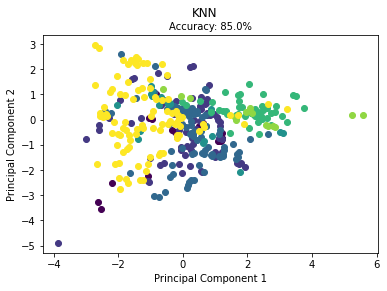

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from utils import train_test_split, normalize, accuracy_score
from utils import euclidean_distance, Plot
class KNN():

    def __init__(self,k=5):

        self.k = k
    def predict(self, X_test, X_train, y_train):

        y_predict = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):

            distances = np.zeros((X_train.shape[0], 2)) #测试的数据和训练的各个数据的欧式距离

            for j in range(X_train.shape[0]):
                dis = euclidean_distance(X_test[i], X_train[j]) #计算欧式距离
                label = y_train[j] #测试集到的每个训练集的数据的分类标签
                distances[j] = [dis, label]

                # argsort()得到测试集到训练的各个数据的欧式距离从小到大排列并且得到序列，然后再取前k个.
                k_nearest_neighbors = distances[distances[:, 0].argsort()][:self.k]

                #利用np.bincount统计k个近邻里面各类别出现的次数
                counts = np.bincount(k_nearest_neighbors[:, 1].astype('int'))

                #得出每个测试数据k个近邻里面各类别出现的次数最多的类别
                testLabel = counts.argmax()
                y_predict[i] = testLabel

        return y_predict

def run():
    #初始化knn
    model = KNN(k=5)
    y_pred = model.predict(X_test, X_train, y_train)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)

    # 用图画出测试集的分类情况
    Plot().plot_in_2d(X_test, y_pred, title="KNN", accuracy=accuracy)


if __name__ == "__main__":
    run()

##分类混淆矩阵

这里需要导入一个py模块具体方法如下：

In [ ]:
#导入py模块
from google.colab import drive
drive.mount('/content/drive/')
#加入路径
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
conf = confusion_matrix(y_test, correct_facies_labels_test)
display_cm(conf, facies_labels, hide_zeros=True)

     Pred    CS    MS    FS    SS    DM    LS   MDS Total
     True
       CS    20                                        20
       MS          80                                  80
       FS                80                            80
       SS                      20                      20
       DM                            53                53
       LS                                  13          13
      MDS                                       100   100


##实现gbdt

In [ ]:
max_depth=4
max_features=10
n_estimators=80
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics
gbm0= GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,y_train)
y_pred= gbm0.predict(X_test)
print("Accuracy : %.4f" % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.8333


In [ ]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
conf = confusion_matrix(y_test, correct_facies_labels_test)
display_cm(conf, facies_labels, hide_zeros=True)

     Pred    CS    MS    FS    SS    DM    LS   MDS Total
     True
       CS    20                                        20
       MS          80                                  80
       FS                80                            80
       SS                      20                      20
       DM                            53                53
       LS                                  13          13
      MDS                                       100   100


##随机森林



In [ ]:
import sys
sys.path.append('/content/Machine-Learning-From-Scratch')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
print('model')
print(rfmodel)

ypredrf1 = rfmodel.predict(X_test)
print('confusion matrix')
print(metrics.confusion_matrix(y_test, ypredrf1))
print('classification report')
print(metrics.classification_report(y_test, ypredrf1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test, ypredrf1)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[17  3  0  0  0  0  0]
 [ 0 72  2  0  0  0  6]
 [ 0  1 75  3  0  0  1]
 [ 0  3  1 15  0  0  1]
 [ 0  0  0  0 52  0  1]
 [ 0  0  0  0  0 13  0]
 [ 0  7  6  1  1  0 85]]
classification report
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       0.84      0.90      0.87        80
           3       0.89      0.94      0.91        80
           4       0.7

###分类混淆矩阵

In [ ]:
#导入py模块
from google.colab import drive
drive.mount('/content/drive/')
#加入路径
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
conf = confusion_matrix(y_test, correct_facies_labels_test)
display_cm(conf, facies_labels, hide_zeros=True)

     Pred    CS    MS    FS    SS    DM    LS   MDS Total
     True
       CS    20                                        20
       MS          80                                  80
       FS                80                            80
       SS                      20                      20
       DM                            53                53
       LS                                  13          13
      MDS                                       100   100


##采用smote

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

train_x = pd.DataFrame(X_train_sm)
train_y = pd.DataFrame(y_train_sm)
print(Counter(y_train_sm))

Counter({5: 928, 3: 928, 7: 928, 1: 928, 2: 928, 4: 928, 6: 928})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

###使用smote的随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(train_x,train_y)
print('model')
print(rfmodel)

ypredrf1 = rfmodel.predict(X_test)
print('confusion matrix')
print(metrics.confusion_matrix(y_test, ypredrf1))
print('classification report')
print(metrics.classification_report(y_test, ypredrf1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test, ypredrf1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[20  0  0  0  0  0  0]
 [ 0 72  3  1  0  0  4]
 [ 0  1 76  2  0  0  1]
 [ 0  3  1 16  0  0  0]
 [ 0  0  0  0 53  0  0]
 [ 0  0  0  0  0 13  0]
 [ 0  6  5  2  1  0 86]]
classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.88      0.90      0.89        80
           3       0.89      0.95      0.92        80
           4       0.7

##MAHAKIL 过采样

In [ ]:
!git clone https://github.com/ai-se/MAHAKIL_imbalance.git

Cloning into 'MAHAKIL_imbalance'...
remote: Enumerating objects: 62, done.
remote: Total 62 (delta 0), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (62/62), done.


In [ ]:
sys.path.append('/content/MAHAKIL')

In [ ]:
import mahakil

data = X_train
label = y_train
mahakil.fit_sample(data, label)

AttributeError: ignored

##pca处理

In [ ]:
!git clone https://github.com/RRdmlearning/Machine-Learning-From-Scratch.git

Cloning into 'Machine-Learning-From-Scratch'...
remote: Enumerating objects: 287, done.
remote: Total 287 (delta 0), reused 0 (delta 0), pack-reused 287
Receiving objects: 100% (287/287), 91.24 KiB | 2.94 MiB/s, done.
Resolving deltas: 100% (133/133), done.


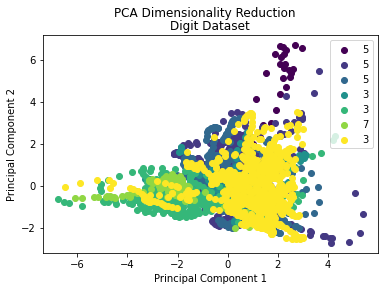

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

class PCA():
    def calculate_covariance_matrix(self, X, Y=None):
        # 计算协方差矩阵

        m = X.shape[0]
        X = X - np.mean(X, axis=0)
        Y = X if Y == None else Y - np.mean(Y, axis=0)
        return 1 / m * np.matmul(X.T, Y)

    def transform(self, X, n_components):
        # 设n=X.shape[1]，将n维数据降维成n_component维

        covariance_matrix = self.calculate_covariance_matrix(X)

        # 获取特征值，和特征向量
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # 对特征向量排序，并取最大的前n_component组
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components]

        # 转换
        return np.matmul(X, eigenvectors)


data = datasets.load_digits()
X = X_train
X_ = X_test
y = y_train

#降到了四维
X_trans = PCA().transform(X, 4)
X_tests = PCA().transform(X_, 4)

x1 = X_trans[:, 0]
x2 = X_trans[:, 1]

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

class_distr = []
# Plot the different class distributions
for i, l in enumerate(np.unique(y)):
    _x1 = x1[y == l]
    _x2 = x2[y == l]
    _y = y[y == l]
    class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

# Add a legend
plt.legend(class_distr, y, loc=1)

# Axis labels
plt.suptitle("PCA Dimensionality Reduction")
plt.title("Digit Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [ ]:
X_trans

array([[-2.26600294, -0.54810012,  0.29714145, -0.62509668],
       [-2.21266339, -0.53400954,  0.29852129, -0.63764502],
       [-2.19406128, -0.50863143,  0.29123398, -0.64414437],
       ...,
       [-3.48795389, -0.32258975,  0.08979368,  1.04604457],
       [-3.63819205, -0.3589572 ,  0.11550593,  1.37186054],
       [-3.86571676, -0.40992478,  0.15476142,  1.86173112]])

##采用pca后的随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(X_trans,y_train)
print('model')
print(rfmodel)

ypredrf1 = rfmodel.predict(X_tests)
print('confusion matrix')
print(metrics.confusion_matrix(y_test, ypredrf1))
print('classification report')
print(metrics.classification_report(y_test, ypredrf1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test, ypredrf1)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[ 0  7  4  0  4  0  5]
 [ 3 18 12  2 17  2 26]
 [ 1 20 22  0 12  0 25]
 [ 1 10  0  2  6  0  1]
 [ 2  5  3  0  2  0 41]
 [ 2  4  0  0  0  0  7]
 [ 1 17 15  3 44  1 19]]
classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.22      0.23      0.22        80
           3       0.39      0.28      0.32        80
           4       0.2